In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(loss="binary_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory("/content/drive/MyDrive/cat and dog/train",
                                            image_size=(180, 180), batch_size=32)

Found 2000 files belonging to 2 classes.


In [ ]:
validation_dataset = image_dataset_from_directory("/content/drive/MyDrive/cat and dog/validation",
                                             image_size=(180, 180),batch_size=32)

Found 1000 files belonging to 2 classes.


In [ ]:
test_dataset = image_dataset_from_directory(
                                    "/content/drive/MyDrive/cat and dog/test",
                                    image_size=(180, 180),batch_size=32)

Found 1000 files belonging to 2 classes.


In [ ]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="convnet_from_scratch.keras",
 save_best_only=True,
 monitor="val_loss")
]

In [ ]:
history = model.fit(
 train_dataset,epochs=30,
 validation_data=validation_dataset,callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 365s 5s/step - loss: 0.7227 - accuracy: 0.5240 - val_loss: 0.7176 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 7s 105ms/step - loss: 0.6988 - accuracy: 0.5560 - val_loss: 0.6846 - val_accuracy: 0.5810
Epoch 3/30
63/63 [==============================] - 7s 103ms/step - loss: 0.7138 - accuracy: 0.5715 - val_loss: 0.6787 - val_accuracy: 0.6280
Epoch 4/30
63/63 [==============================] - 7s 103ms/step - loss: 0.6891 - accuracy: 0.6275 - val_loss: 0.6559 - val_accuracy: 0.5990
Epoch 5/30
63/63 [==============================] - 7s 102ms/step - loss: 0.6446 - accuracy: 0.6425 - val_loss: 0.6736 - val_accuracy: 0.5730
Epoch 6/30
63/63 [==============================] - 7s 102ms/step - loss: 0.6175 - accuracy: 0.6765 - val_loss: 0.6869 - val_accuracy: 0.6230
Epoch 7/30
63/63 [==============================] - 7s 104ms/step - loss: 0.5801 - accuracy: 0.7090 - val_loss: 0.6127 - val_accuracy: 0.6720
Epoch 8

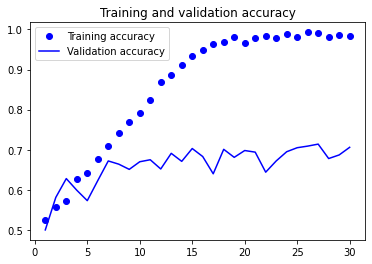

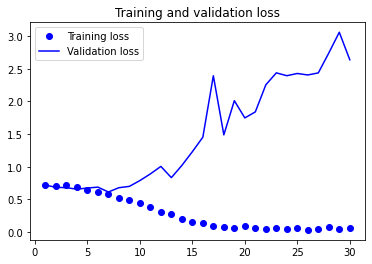

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset) 

32/32 [==============================] - 152s 3s/step - loss: 2.3541 - accuracy: 0.7030


Data Augmentation

In [ ]:
data_augmentation = keras.Sequential(
 [
 layers.RandomFlip("horizontal"),
 layers.RandomRotation(0.1),
 layers.RandomZoom(0.2),
 ]
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


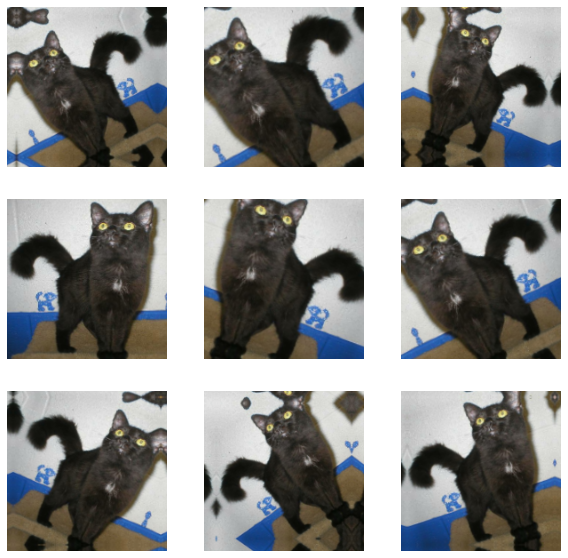

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(2):
 for i in range(9):

  augmented_images = data_augmentation(images)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_images[0].numpy().astype("uint8"))
  plt.axis("off")

#Listing 8.16 Defining a new convnet that includes image augmentation and dropout


In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(loss="binary_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])

In [ ]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="convnet_from_scratch_with_augmentation.keras",
 save_best_only=True,monitor="val_loss")]

history = model.fit(train_dataset, epochs=100,
                  validation_data=validation_dataset,
                  callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 9s 110ms/step - loss: 0.7013 - accuracy: 0.5135 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 7s 108ms/step - loss: 0.6964 - accuracy: 0.5445 - val_loss: 0.6854 - val_accuracy: 0.5830
Epoch 3/100
63/63 [==============================] - 7s 106ms/step - loss: 0.6831 - accuracy: 0.5785 - val_loss: 0.6651 - val_accuracy: 0.6450
Epoch 4/100
63/63 [==============================] - 7s 107ms/step - loss: 0.6678 - accuracy: 0.6100 - val_loss: 0.6457 - val_accuracy: 0.6410
Epoch 5/100
63/63 [==============================] - 7s 105ms/step - loss: 0.6579 - accuracy: 0.6260 - val_loss: 0.6404 - val_accuracy: 0.6490
Epoch 6/100
63/63 [==============================] - 7s 106ms/step - loss: 0.6288 - accuracy: 0.6510 - val_loss: 0.6516 - val_accuracy: 0.6220
Epoch 7/100
63/63 [==============================] - 7s 108ms/step - loss: 0.6199 - accuracy: 0.6610 - val_loss: 0.6110 - val_accuracy: 0.6750

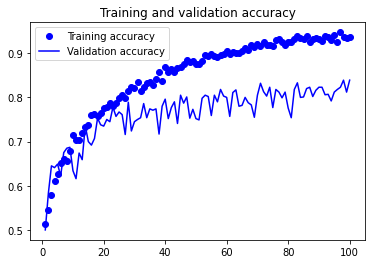

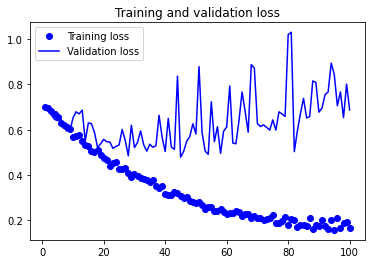

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model(
 "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 59ms/step - loss: 0.4707 - accuracy: 0.8090
Test accuracy: 0.809


#Feature extraction with a pretrained model

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
 weights="imagenet",
 include_top=False,
 input_shape=(180, 180, 3))

In [ ]:
import numpy as np
def get_features_and_labels(dataset):
 all_features = []
 all_labels = []
 for images, labels in dataset:
    preprocessed_images = keras.applications.vgg16.preprocess_input(images)
    features = conv_base.predict(preprocessed_images)
    all_features.append(features)
    all_labels.append(labels)
 return np.concatenate(all_features), np.concatenate(all_labels)


In [ ]:
train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

In [ ]:
train_features.shape

(2000, 5, 5, 512)

#Listing 8.21 Defining and training the densely connected classifier

In [ ]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.compile(loss="binary_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])

callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="feature_extraction.keras",
 save_best_only=True,
 monitor="val_loss") ]


In [ ]:
history = model.fit(
 train_features, train_labels,
 epochs=20,
 validation_data=(val_features, val_labels),
 callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 1s 9ms/step - loss: 17.9008 - accuracy: 0.9245 - val_loss: 7.8176 - val_accuracy: 0.9610
Epoch 2/20
63/63 [==============================] - 1s 8ms/step - loss: 3.2880 - accuracy: 0.9795 - val_loss: 4.8203 - val_accuracy: 0.9660
Epoch 3/20
63/63 [==============================] - 0s 8ms/step - loss: 2.0235 - accuracy: 0.9885 - val_loss: 4.6018 - val_accuracy: 0.9670
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 0.8522 - accuracy: 0.9950 - val_loss: 6.7483 - val_accuracy: 0.9610
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 0.6675 - accuracy: 0.9945 - val_loss: 11.3019 - val_accuracy: 0.9450
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 1.4043 - accuracy: 0.9935 - val_loss: 5.9419 - val_accuracy: 0.9640
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 0.2814 - accuracy: 0.9965 - val_loss: 5.7490 - val_accuracy: 0.9710
Epoch 8/20
63/63 [

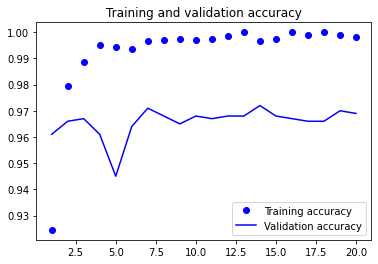

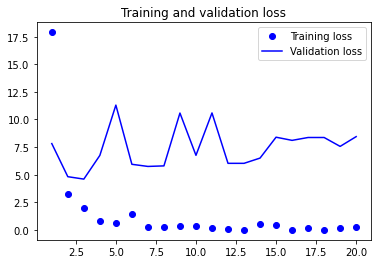

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#Listing 8.23 Instantiating and freezing the VGG16 convolutional base


In [ ]:
conv_base = keras.applications.vgg16.VGG16(
 weights="imagenet",
 include_top=False)
conv_base.trainable = False


Listing 8.24 Printing the list of trainable weights before and after freezing

In [ ]:
conv_base.trainable = True
print("This is the number of trainable weights "
 "before freezing the conv base:", len(conv_base.trainable_weights))

# This is the number of trainable weights before freezing the conv base: 26

conv_base.trainable = False
print("This is the number of trainable weights "
 "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26
This is the number of trainable weights after freezing the conv base: 0


Now we can create a new model that chains together

1 A data augmentation stage

2 Our frozen convolutional base

3 A dense classifier

#Listing 8.25 Adding a data augmentation stage and a classifier to the convolutional base


In [ ]:
data_augmentation = keras.Sequential(
    [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
    ])

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

model.compile(loss="binary_crossentropy",
             optimizer="rmsprop",metrics=["accuracy"])


In [ ]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="feature_extraction_with_data_augmentation.keras",
 save_best_only=True,
 monitor="val_loss")
]

In [ ]:
history = model.fit(
 train_dataset,
 epochs=50,
 validation_data=validation_dataset,
 callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 11s 150ms/step - loss: 18.3524 - accuracy: 0.9075 - val_loss: 8.0836 - val_accuracy: 0.9430
Epoch 2/50
63/63 [==============================] - 10s 149ms/step - loss: 8.3532 - accuracy: 0.9360 - val_loss: 6.8142 - val_accuracy: 0.9610
Epoch 3/50
63/63 [==============================] - 10s 149ms/step - loss: 5.7628 - accuracy: 0.9535 - val_loss: 5.2292 - val_accuracy: 0.9690
Epoch 4/50
63/63 [==============================] - 10s 147ms/step - loss: 4.5582 - accuracy: 0.9630 - val_loss: 5.5713 - val_accuracy: 0.9630
Epoch 5/50
63/63 [==============================] - 10s 146ms/step - loss: 3.0750 - accuracy: 0.9685 - val_loss: 6.2844 - val_accuracy: 0.9630
Epoch 6/50
63/63 [==============================] - 10s 146ms/step - loss: 3.9871 - accuracy: 0.9660 - val_loss: 6.9874 - val_accuracy: 0.9610
Epoch 7/50
63/63 [==============================] - 10s 146ms/step - loss: 2.7605 - accuracy: 0.9710 - val_loss: 5.3720 - val_accuracy: 0.968

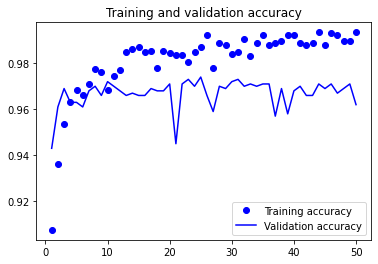

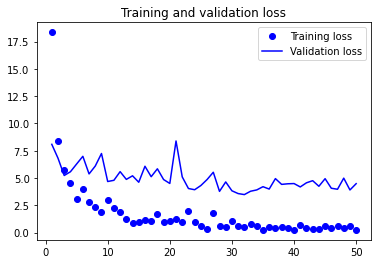

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#Listing 8.26 Evaluating the model on the test set


In [ ]:
test_model = keras.models.load_model(
 "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 92ms/step - loss: 4.2927 - accuracy: 0.9720
Test accuracy: 0.972


#8.3.2 Fine-tuning a pretrained model


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
 layer.trainable = False

In [ ]:
model.compile(loss="binary_crossentropy",
 optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
 metrics=["accuracy"])

In [ ]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="fine_tuning.keras",
 save_best_only=True,
 monitor="val_loss")
]

In [ ]:
history = model.fit(
 train_dataset,
 epochs=30,
 validation_data=validation_dataset,
 callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 13s 169ms/step - loss: 0.7770 - accuracy: 0.9865 - val_loss: 3.5163 - val_accuracy: 0.9690
Epoch 2/30
63/63 [==============================] - 11s 167ms/step - loss: 0.5378 - accuracy: 0.9885 - val_loss: 3.4190 - val_accuracy: 0.9680
Epoch 3/30
63/63 [==============================] - 11s 168ms/step - loss: 0.4794 - accuracy: 0.9925 - val_loss: 2.9031 - val_accuracy: 0.9680
Epoch 4/30
63/63 [==============================] - 11s 163ms/step - loss: 0.3505 - accuracy: 0.9910 - val_loss: 2.9969 - val_accuracy: 0.9750
Epoch 5/30
63/63 [==============================] - 11s 169ms/step - loss: 0.4680 - accuracy: 0.9895 - val_loss: 2.5641 - val_accuracy: 0.9720
Epoch 6/30
63/63 [==============================] - 11s 168ms/step - loss: 0.2276 - accuracy: 0.9920 - val_loss: 2.4450 - val_accuracy: 0.9710
Epoch 7/30
63/63 [==============================] - 11s 163ms/step - loss: 0.1696 - accuracy: 0.9950 - val_loss: 2.6230 - val_accuracy: 0.9710

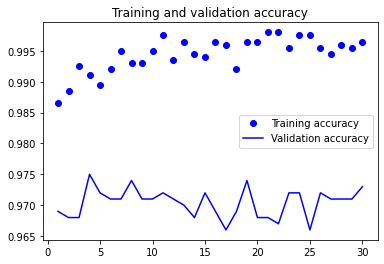

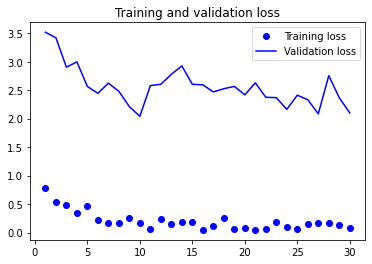

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 92ms/step - loss: 2.3392 - accuracy: 0.9760
Test accuracy: 0.976
